# SHSAT Participation in New York Schools

## Introduction

Of New York City's highschools, nine "specialized high schools" are set apart from the rest as elite institutions made up of some of the brightest students in the city. These schools offer a variety of academic and art programs to students who are deemed worthy of attending. With the exception of Fiorello H. LaGuardia High School—which is the only specialized school focusing on the arts—New York City's specialized schools grant admission based on performance on the Specailized High Schools Admissions Test (SHSAT). The SHSAT is a standardized test that an average of 30,000 students acriss New York's school participate in eaech year. And though the SHSAT's purpose is to isolate merit alone to deterrmine admission into these top schools, black and hispanic students are severely underrepresented in New York City's specialized high schools.

Various factors may be at play in contributing to this problem, and there is not one single cause that is responsible for the misrepresentation of New York's student population in these schools. As the specialized schools have a proven track record of helping their students grow and succeed beyond what would be expected at non-specialized schools, it is imperative that the causes behind the aforementioned issues are uncovered.

Datasets from PASSNYC provide information on primary and middle schools in New York. The data include geographical information, racial demographics, socioeconomic variables, and overall performance and quality measurerments of each school and its student body. We also have data on 30 schools in District 5 (Manhattan), pertaining to their participation in the SHSAT (i.e: the number of registrations and tests taken) between 2013 and 2016. Using these two datasets, we seek to identify potential causes behind the lack of representation of black and hispanic students in New York City's specialized high schools. Specifically, we inspect how variables including economic need, quality of school, and school size are related to the racial make up of schools, and how they may impact academic performance, and hence registration and participation in the SHSAT.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Loading Data
school = pd.read_csv('~/ECO225 Project/Data/2016 School Explorer.csv')
SHSAT = pd.read_csv('~/ECO225 Project/Data/D5 SHSAT Registrations and Testers.csv')
SHSAT['School name'] = SHSAT['School name'].str.upper()
SHSAT = SHSAT.rename(columns={'School name': 'School Name'})

#Cleaning data - Converting percentages into floats

def percentfloat(var):
    return float(var.replace('%',''))

races = ['Percent Asian', 'Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White']
for r in races:
    school[r] = school[r].apply(percentfloat)
races.remove('Percent Black / Hispanic')

quality = ['Rigorous Instruction %', 'Collaborative Teachers %', 'Supportive Environment %',
           'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %']
for q in quality:
    school[q] = school[q].apply(str).apply(percentfloat)

In [2]:
#Dropping rows with 0% for quality percentages - these are likely recording issues as all but 3 data points
school = school.drop(school.index[school['Rigorous Instruction %'] == 0].tolist())

school.set_index('School Name')
SHSAT.set_index('School Name')

data = pd.merge(school, SHSAT, how = 'outer')
data = data.rename({'Number of students who registered for the SHSAT': 'SHSAT Registration',
             'Number of students who took the SHSAT': 'SHSAT Participation',
            'Enrollment on 10/31' : 'Enrollment'}, axis = 1)


#New column to groupby registration for SHSAT status
def registered(df):
    if df == 0:
        return "No Registered Students"
    elif df > 0:
        return "Registered Students"
    else:
        return "Unknown"
data['SHSAT'] = data['SHSAT Registration'].apply(registered)
data['SHSAT Registration Proportion'] = data['SHSAT Registration'] / data['Enrollment']
data['SHSAT Participation Proportion'] = data['SHSAT Participation'] / data['Enrollment']

group1 = data.groupby('SHSAT')
Not = "No Registered Students"
Did = 'Registered Students'

In [3]:
def qs(column):
    Qs = []
    for i in [0.25, 0.5, 0.75]:
        Qs.append(data[column].quantile(i))
    return Qs

def quartiles(df):
    if df <= Qs[0]:
        return "Q1"
    elif Qs[0] < df <= Qs[1]:
        return "Q2"
    elif Qs[1] < df <= Qs[2]:
        return "Q3"
    elif Qs[2] < df:
        return "Q4"

Qs = qs('Average Math Proficiency')
data['Math Quartiles'] = data['Average Math Proficiency'].apply(quartiles)

Qs = qs('Average ELA Proficiency')
data['ELA Quartiles'] = data['Average ELA Proficiency'].apply(quartiles)

Qs = qs('SHSAT Registration Proportion')
data['SHSAT R-Prop Quartiles'] = data['SHSAT Registration Proportion'].apply(quartiles)

Qs = qs('SHSAT Participation Proportion')
data['SHSAT P-Prop Quartiles'] = data['SHSAT Participation Proportion'].apply(quartiles)

## EDA: The distributions of academic proficiency and racial demographics in New York Schools

The SHSAT consists of an English and a Mathematics section. Though other minor factors may affect performance on the SHSAT, students' preformance in English and Math during primary and middle school may be predictive of their SHSAT scores, and hence admission to New York's specialized schools.

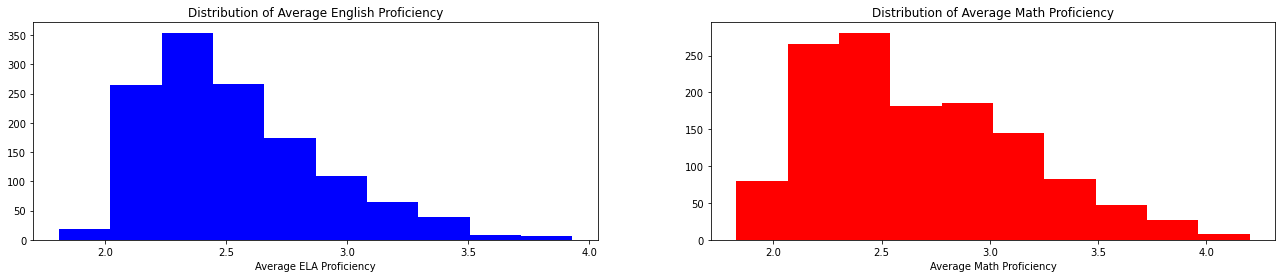

In [4]:
#Histogram of dependant variables: Average ELA / Math Proficiency Scores

fig, axs = plt.subplots(1, 2)
axs[0].hist('Average ELA Proficiency', color = 'b', data = data)
axs[0].set_title('Distribution of Average English Proficiency')
axs[0].set_xlabel('Average ELA Proficiency')

axs[1].hist('Average Math Proficiency', color = 'r', data = data)
axs[1].set_title('Distribution of Average Math Proficiency')
axs[1].set_xlabel('Average Math Proficiency')

plt.subplots_adjust(right = 3)

With the data provided, we see that most schools have average ELA and Math scores between 2.0 and 3.0, though some schools perform significantly above average; the data is right skewed.

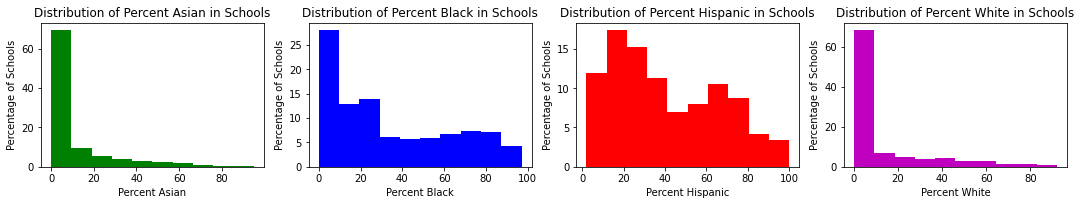

In [5]:
#Histograms of percentages of races
fig, axs = plt.subplots(1,4)
i = 0
k = 0
for r in races:
    color = ['g', 'b', 'r', 'm']
    axs[k].hist(r, color = color[i], data = data, weights=np.ones(len(data)) * 100 / len(data))
    axs[k].set_title("Distribution of " + r +' in Schools')
    axs[k].set_xlabel(r)
    axs[k].set_ylabel('Percentage of Schools')
    i += 1
    k += 1
plt.subplots_adjust(right = 2.5, top = 1, bottom = 0.5)

Summary statistics and histograms show that New York City's schools are diverse. While there are schools with fewer asian or white students, there are few schools that are completely dominated by a given race. 

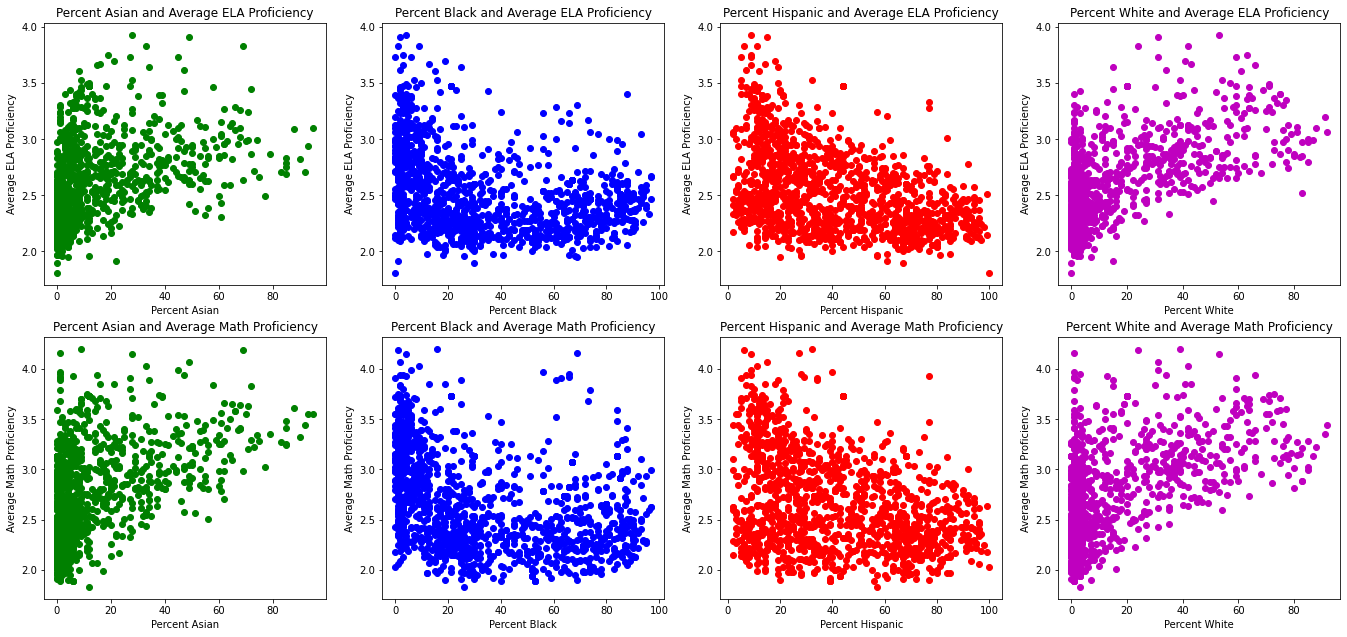

,Percent Asian,Percent Black,Percent Hispanic,Percent White
ELA Quartiles,,,,
Q1,2.390671,40.058309,54.067055,2.145773
Q2,5.801242,43.577640,44.922360,3.940994
Q3,12.782334,37.381703,36.987382,10.782334
Q4,24.003115,13.520249,25.317757,34.133956


,Percent Asian,Percent Black,Percent Hispanic,Percent White
Math Quartiles,,,,
Q1,2.344512,46.631098,47.362805,2.246951
Q2,5.067073,40.445122,48.597561,4.143293
Q3,12.932099,30.740741,40.635802,13.611111
Q4,24.222910,16.845201,25.452012,30.569659


In [6]:
fig, axs = plt.subplots(2, 4)

x = 0
for subject in ['Average ELA Proficiency', 'Average Math Proficiency']:
    i = 0
    k = 0
    for r in races:
        color = ['g', 'b', 'r', 'm']
        axs[x, k].plot(r, subject, 'o', color = color[i], data = data)
        axs[x, k].set_title(r + ' and ' + subject)
        axs[x, k].set_xlabel(r)
        axs[x, k].set_ylabel(subject)
        i += 1
        k += 1
    x += 1

plt.subplots_adjust(left = 0, right = 3, bottom = 2, top = 4)
plt.show()

english = data.groupby('ELA Quartiles')
math = data.groupby('Math Quartiles')

display(english[races].mean(), math[races].mean())

Unfortunataely, as the distribution of students in New York's specialized schools would suggest, there seems to be a relationshsip between the racial makeup of schools and academimc performance. Schools with more White and Asian students perform better in both subjects, relative to predominantly Black or Hispanic schools. More specifically, ranking schools by their performance on proficiency tests, we see that for both Math and English, the data show that top performaing schools in both Math and English have higher proportions of Asian and White students compared to schools with lower preformances. On the other hand, the schoools with lowest scores have higher percentages of Black and Hispanic students.

The data verifies what was already suspected.  Notably, however, the spread of schools' performances is high. While there is a negative trend betwewen Percentage of Black or Hispanic students and ELA / Math Proficiency, some high performing schools have high percentages of Black or Hispanic students. Thus, providing aid strictly based on race may not be the best use of resources. Identifing and remedying the causes behind the negative trend will be more effective and efficient.

### Race, Economic Need, and Academic Success

One determinant of academic success that has been heavily studied is a student's socioeconomic status (SES). Brownell et al (2006) find that even at a Grade 3 level, students with low SES—which is strongly determined byy a family's financial stability—had a pass rate on Language Arts tests 34 percentage points lower than students from with high socioeconomic status. In another approach, Janus and Duku (2010) find a positive correlation between students' family incomes and teachers' assessments of their readiness for school through their assigned Early Development Instrument (EDI) score. Forget-Dubois et al. (2010) show that variations in students' EDI scores account for 36% of variation in their eventual academic achievement. Hence, we begin our invetigation by inspecting relationships between racial demographics and economic need.

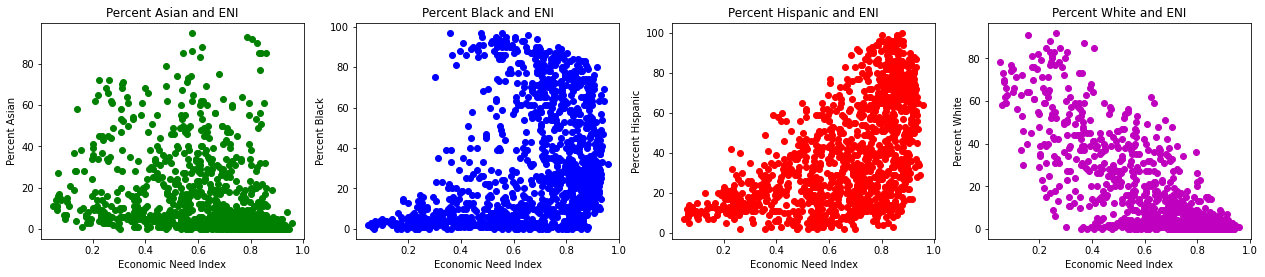

In [7]:
#Economic Need and Race

fig, axs = plt.subplots(1,4)
i = 0
k = 0
for r in races:
    color = ['g', 'b', 'r', 'm']
    axs[k].plot('Economic Need Index', r, 'o', color = color[i], data = school)
    axs[k].set_title(r + ' and ENI')
    axs[k].set_xlabel('Economic Need Index')
    axs[k].set_ylabel(r)
    i += 1
    k += 1
plt.subplots_adjust(left = 0, right = 2.8, bottom = 0.75, top = 1.5)

Scatter plots show that the racial makeup of a school is correlated with economic need. While schools with higher proportion of White students are less likely to be economically disadvantaged, there is strong positive correlation between ENI and the percentage of black Black or Hispanic students. Though there are exceptions, there is a slight negative relationship between ENI and the percentage of Asian students in a given school.


Text(0, 0.5, 'Percent Black / Hispanic')

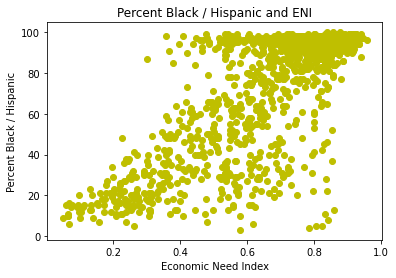

In [8]:
#ENI and Black / Hispanic
plt.plot('Economic Need Index', 'Percent Black / Hispanic', 'o', color = 'y', data = school)
plt.title('Percent Black / Hispanic and ENI')
plt.xlabel('Economic Need Index')
plt.ylabel('Percent Black / Hispanic')

When looking at the percentage of students whos are either Black or Hispanic, the relationship with ENI is even more defined. Schools in New York City that are mostly populated by Black or Hispanic students are less well off than those with predominantly White or Asian students.

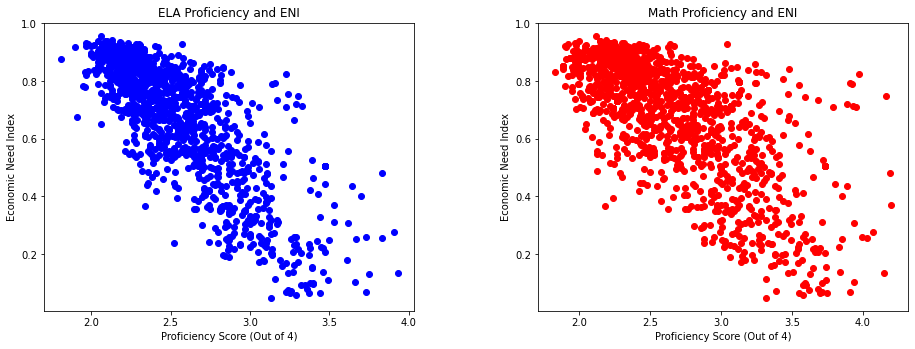

In [9]:
fig, axs = plt.subplots(1,2)

axs[0].plot('Average ELA Proficiency', 'Economic Need Index', 'o', color = 'b', data = data)
axs[0].set_title('ELA Proficiency and ENI')
axs[0].set_xlabel('Proficiency Score (Out of 4)')
axs[0].set_ylabel('Economic Need Index')

axs[1].plot('Average Math Proficiency', 'Economic Need Index', 'o', color = 'r', data = data)
axs[1].set_title('Math Proficiency and ENI')
axs[1].set_xlabel('Proficiency Score (Out of 4)')
axs[1].set_ylabel('Economic Need Index')

plt.tight_layout()
plt.subplots_adjust(left = 0, right = 2, bottom = 0, top = 1)


#### The Importance of Race and Economic Need

The data clearly shows that academic success is negatively correlated with economic need; the more economically disadvantaged students at a school are, the worse they score on Math and English proficiency tests. Evidently, economic well being has an influence on a student's academic success. With such a strong correlation between black and hispanic population and ENI, providing aid to schools that are the most financially disadvantaged will improve black and hispanic students' academic success the most, and may make the distributions of New York's Specialized High Schools' student populations more equitable.

However, obviously, simply giving money to poorer schools will not directly improve students' performances. It is plausible that other factors, namely the quality of teaching and institution, might also have an effect on the academic success of each school's students.


###### Sources:

Brownell et al. (2006) https://irpp.org/research-studies/is-the-class-half-empty/

Janus and Duku (2010) https://www.tandfonline.com/doi/full/10.1080/10409280701610796a?casa_token=tAuQb9o3tWcAAAAA%3ATf-QJXUI36zcmrAszq8sA544Hs60ANnrBIxLyi6hdIUxX1jiyaDXHmHW21qAv5UdTPi2LSVErQvWgEk

Forget-Dubois et al. (2010) https://www.tandfonline.com/doi/full/10.1080/10409280701610796

### Quality of Teaching at New York High Schools

Every year, the New York School board conducts student, teacher, and parent surveys to guage the quality of each schoool. There are 6 categories in the survey. According to the Framework & School Survey Scoring Technical Guide: 

"Rigorous Instruction" describes the extent to which a school encourages critical thinking, student engagement, and adheres to the Common Core. Questions in this sections ask students about guidance teachers provide them.

"Collaborative Teachers" describes teachers' engagement in the community. It asks students about diversity in teachers' curricula, and teachers' abilities to adapt to different backgrounds. It also asks teachers about collaboration between faculty, and building of a school community.

"Supportive Environment" describes the amount of guidance and support teachers provide students along their academic journey. Students answer questions regarding academic and social support, including the amount of assistance when they fall behind or feel unsafe. Notably, this section also asks students to describe the help teachers provide them regarding application processes, whether for high schools or post secondary institutions.

"Effective School Leadership" describes parents and teachers' view on the vision and performance of the school's principle or leader.

"Strong Family-Community Ties" describes the involvement of parents in school activity, from communications with teachers about their children, to participation in school events.

"Trust" describes the sense of community within the school. Students, teachers, and parents all respond to questions regarding the extent to which they believe the school is a safe and welcoming space.

Put together, these variables measure the qualitiy of each school. Score are assigned based on the percentage of answers that are "positive". As each variable measures a different aspect of a school, we will inspect the relationship between each and academic performance.

Every year, the New York School board conducts student, teacher, and parent surveys to guage the quality of each schoool. There are 6 categories in the survey. According to the Framework & School Survey Scoring Technical Guide: 

"Rigorous Instruction" describes the extent to which a school encourages critical thinking, student engagement, and adheres to the Common Core. Questions in this sections ask students about guidance teachers provide them.

"Collaborative Teachers" describes teachers' engagement in the community. It asks students about diversity in teachers' curricula, and teachers' abilities to adapt to different backgrounds. It also asks teachers about collaboration between faculty, and building of a school community.

"Supportive Environment" describes the amount of guidance and support teachers provide students along their academic journey. Students answer questions regarding academic and social support, including the amount of assistance when they fall behind or feel unsafe. Notably, this section also asks students to describe the help teachers provide them regarding application processes, whether for high schools or post secondary institutions.

"Effective School Leadership" describes parents and teachers' view on the vision and performance of the school's principle or leader.

"Strong Family-Community Ties" describes the involvement of parents in school activity, from communications with teachers about their children, to participation in school events.

"Trust" describes the sense of community within the school. Students, teachers, and parents all respond to questions regarding the extent to which they believe the school is a safe and welcoming space.

Put together, these variables measure the qualitiy of each school. Score are assigned based on the percentage of answers that are "positive". As each variable measures a different aspect of a school, we will inspect the relationship between each and academic performance.

###### Sources:
https://infohub.nyced.org/docs/default-source/default-document-library/frameworkandschoolsurveyscoringtechnicalguide70216de6148c4003a8a3aaaddd58dd63.pdf?sfvrsn=f21db7fd_2

In [36]:
print('Note: The data for Stem Institute of Manhattan, P.S 150 Christopher,'
      + 'and Great Oaks Charter School have been omitted from \n the data due to their quality scores'
      + 'likely being misreported. Each school has a "Rigorous Instructiono" score of 0%, which \n is a ' 
      + 'singificant outlier given the rest of the datapoints.'
      + 'As such, there is cause to believe that those data are \n misreported, and thus should be omitted from analysis.')

Note: The data for Stem Institute of Manhattan, P.S 150 Christopher,and Great Oaks Charter School have been omitted from 
 the data due to their quality scoreslikely being misreported. Each school has a "Rigorous Instructiono" score of 0%, which 
 is a singificant outlier given the rest of the datapoints.As such, there is cause to believe that those data are 
 misreported, and thus should be omitted from analysis.


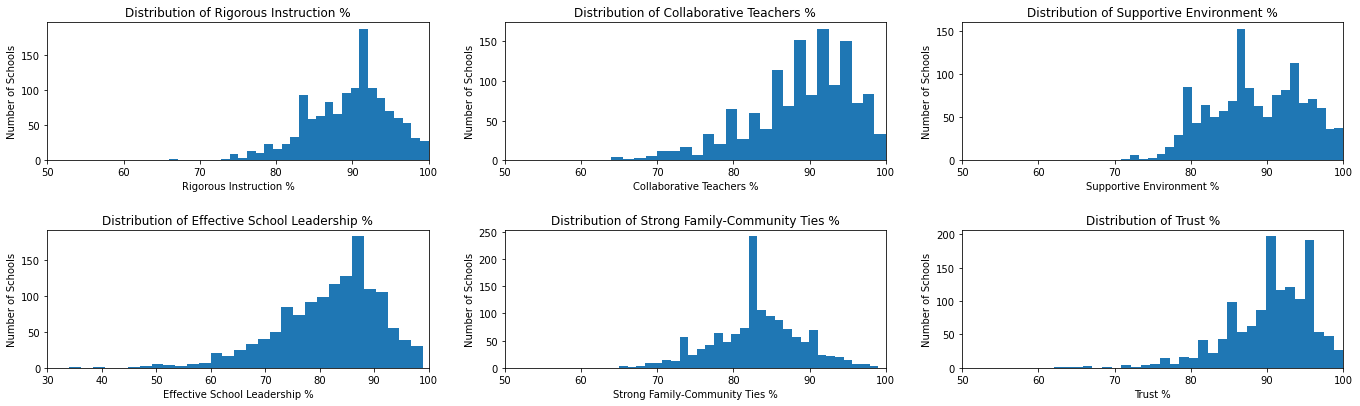

Note: The data for Stem Institute of Manhattan, P.S 150 Christopher, and Great Oaks Charter Schoolhave been omitted from 
 the data due to their quality scores likely being misreported.


In [35]:
fig, axs = plt.subplots(2,3)
i = 0
j = 0
for q in quality:
    axs[i, j].hist(q, data = data, bins = 30)
    axs[i, j].set_title("Distribution of " + q)
    axs[i, j].set_ylabel('Number of Schools')
    axs[i, j].set_xlabel(q)
    axs[i, j].set_xlim(50, 100)
    j += 1
    if j == 3:
        j = 0
        i += 1
        
axs[1, 0].set_xlim(30, 100)        
plt.tight_layout
plt.subplots_adjust(left = 0, right = 3, bottom = 0.5, top = 1.7, hspace = 0.5)
plt.show()

print('Note: The data for Stem Institute of Manhattan, P.S 150 Christopher, and Great Oaks Charter School'
      + 'have been omitted from \n the data due to their quality scores likely being misreported.')

Schools in New York typically score high on measures of school quality. While all relatively moundshaped, we see that measures of School Leadership and Family-Community Ties have highest variance.

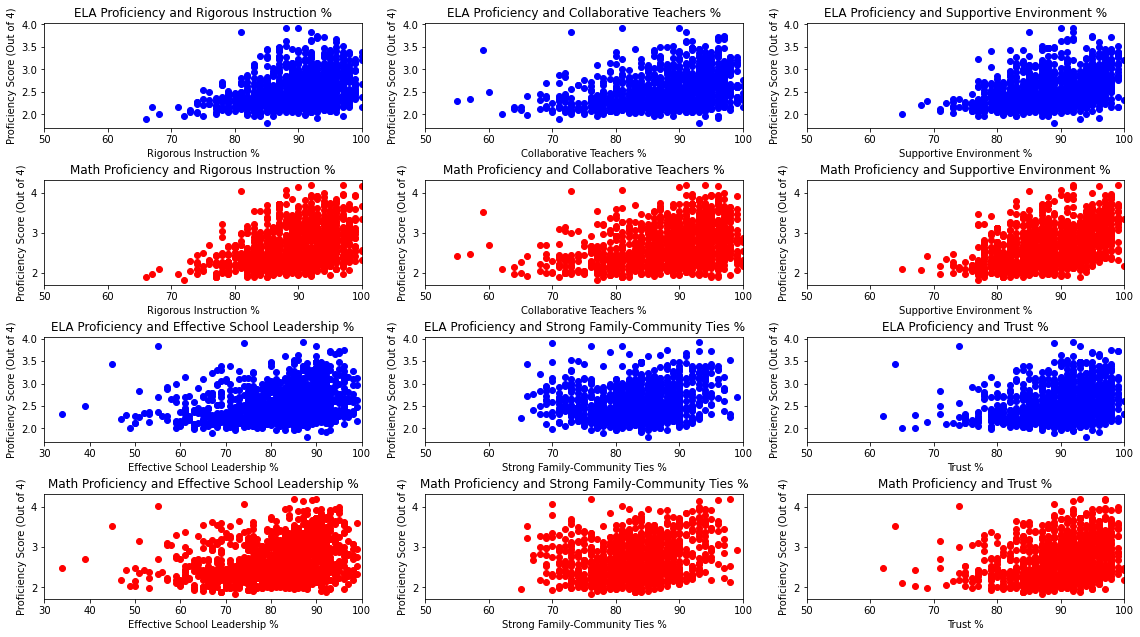

Note: The data for Stem Institute of Manhattan, P.S 150 Christopher, and Great Oaks Charter Schoolhave been omitted from 
 the data due to their quality scores likely being misreported.


In [34]:
i = 0
j = 0
fig, axs = plt.subplots(4,3)
for q in quality:

    axs[i, j].plot(q, 'Average ELA Proficiency', 'o', color = 'b', data = data)
    axs[i, j].set_xlim(50, 100)
    axs[i, j].set_title('ELA Proficiency and ' + q)
    axs[i, j].set_ylabel('Proficiency Score (Out of 4)')
    axs[i, j].set_xlabel(q)

    axs[i + 1, j].plot(q, 'Average Math Proficiency', 'o', color = 'r', data = data)
    axs[i + 1, j].set_xlim(50, 100)
    axs[i + 1, j].set_title('Math Proficiency and ' + q)
    axs[i + 1, j].set_ylabel('Proficiency Score (Out of 4)')
    axs[i + 1, j].set_xlabel(q)
    
    if j == 2:
        i = 2
        j = -1
    j += 1
    
axs[2, 0].set_xlim(30, 100)
axs[3, 0].set_xlim(30, 100)
    
plt.subplots_adjust(left = 0, right = 2.5, bottom = 1, top = 3, hspace = 0.5)
plt.show()

print('Note: The data for Stem Institute of Manhattan, P.S 150 Christopher, and Great Oaks Charter School'
      + 'have been omitted from \n the data due to their quality scores likely being misreported.')

The data show that for each measure of quality of schooling, a higher score is associated with better scores in both Math and ELA proficiency. School leadership is an exception in that the trend is the least defined. However, for the rest of the measures of quality, the data suggests that improving on certain aspects of school quality can improve outcomes of students' learning.

In [37]:
i = 0
quality_quantiles = []
for q in quality:
    quality_quantiles.append(q.replace('%', '') + 'Quartiles')
for q in quality:
    Qs = qs(q)
    data[quality_quantiles[i]] = data[q].apply(quartiles)
    i += 1

qdfs = ['rigorous', 'collaborative', 'supportive', 'leadership', 'ties', 'trust']
i = 0
for q in quality:
    qdfs[i] = data.groupby(quality_quantiles[i])
    i += 1
    
for q in qdfs:
    display(q[races].mean())

print('Note: The data for Stem Institute of Manhattan, P.S 150 Christopher, and Great Oaks Charter School'
      + 'have been omitted from \n the data due to their quality scores likely being misreported.')

,Percent Asian,Percent Black,Percent Hispanic,Percent White
Rigorous Instruction Quartiles,,,,
Q1,6.888889,42.800000,43.191667,5.372222
Q2,12.286533,31.676218,42.939828,11.154728
Q3,13.096220,30.010309,39.945017,14.766323
Q4,12.693694,29.285285,36.378378,19.366366


,Percent Asian,Percent Black,Percent Hispanic,Percent White
Collaborative Teachers Quartiles,,,,
Q1,8.669421,39.027548,43.575758,6.942149
Q2,10.964674,36.331522,40.703804,10.092391
Q3,12.961538,28.369822,39.926036,16.479290
Q4,12.284091,29.628788,37.806818,18.064394


,Percent Asian,Percent Black,Percent Hispanic,Percent White
Supportive Environment Quartiles,,,,
Q1,6.200542,47.111111,39.753388,5.181572
Q2,8.598039,36.068627,43.098039,10.500000
Q3,10.311573,31.537092,44.489614,11.762611
Q4,19.975078,18.376947,35.585670,23.314642


,Percent Asian,Percent Black,Percent Hispanic,Percent White
Effective School Leadership Quartiles,,,,
Q1,10.005780,34.534682,45.294798,8.254335
Q2,10.253731,36.188060,41.883582,9.856716
Q3,12.310056,33.349162,38.421788,14.011173
Q4,11.911565,30.397959,36.785714,18.363946


,Percent Asian,Percent Black,Percent Hispanic,Percent White
Strong Family-Community Ties Quartiles,,,,
Q1,13.262338,31.766234,43.218182,10.246753
Q2,11.942857,36.469841,41.082540,8.596825
Q3,10.698061,33.828255,41.376731,12.105263
Q4,7.632353,33.154412,35.867647,20.404412


,Percent Asian,Percent Black,Percent Hispanic,Percent White
Trust Quartiles,,,,
Q1,9.161125,39.754476,41.301790,7.964194
Q2,10.303887,34.406360,42.081272,11.243816
Q3,11.194118,32.250000,41.885294,12.770588
Q4,14.112853,27.278997,37.536050,18.605016


Note: The data for Stem Institute of Manhattan, P.S 150 Christopher, and Great Oaks Charter Schoolhave been omitted from 
 the data due to their quality scores likely being misreported.


For the most part, the quality of schools in the dataset are also negatively correlated with the proportion of Black and Hispanic students. The only measure without a decreasing trend with proportion of Black studuents is leadership, though the top scoring schools in this category still have significantly smaller proportion of black students. There also seems to be ambiguity in how the proportion of Hispanic students and Supportive Environment scores are spread throughout New York. Though the average proportion of Hispanic students is higher in the lowest quartile of Supportive schools than in the highest quartile, average proportion of Hispanic students are seen in the 3rd quartile.

On the other hand, the data provides evidence towards the socioeconomic advantages White students have over their peers. In all but the family-community ties measurements, a higher proportion of white students is associated with higher scores. While there also seems to be a similar relationship with Asian students, the distribution is the least defined for the 4 races. In fact, there seems to be a negative relationship between prpoortion of asian students and family-community tie scores. This category is based on levels of trust between students and teachers, parents and teachers / school leadership, and within teachers.

#### The Importance of Quality of Institutions

Intuitively, we expect that students that attend higher quality schools should outperform peers at lower ranking institutions. Students from lower quality schools would therefore benefit from receiving aid from PASSNYC.

Having rigorous instructions means that teachers are promoting critical thinking. While there is debate surrounding whether critical thinking affects academic performance on top of natural intelligence, Stupnisky et al. (2008) found that those with high disposition to critical thinking, that is those who are more likely to apply critical thinking to scenarios, do indeed achieve higher scores. A more recent study by Ren et al. (2020) shows that Chinese school aged children with higher disposition to critical thinking score higher in Math and Chinese specifically to a statistically significant extent.

Attending a school with collaborative teachers who take into account student diversity and encourage social learning is also likely to improve student achievement. According to In, Kim, and Carney (2019), strong social skills and a diverse school environment improve children's life satisfaction, which Gilman and Huebner (2006) find to be positively related to GPA.

The relationship between supportive teachers and achievement is also expected. Studying a sample of children between pre-school to Grade 3, O'Connor and McCartney (2007) find that the quality of student-teacher relationship has a positive effect on academic achievement. The same study also suggests that high quality relationships with teachers can also overcome the negative effects of insecure maternal attachment. The New York School Board also measures supportiveness in terms of assistance provided for children who fall behind. Ross et al. (1995) find that the Reading Recovery program for low achieving students is effective in helping the tutored students pass their classes.

Mitchell, Kensler, and Tschannen-Moran (2015) find a positive correlation between schools' instructional leadership, which is a function of many of the same questions on the New School quality of schol survey, has a positive correlation on students, paretns, and teachers' academic expectations, which in turn show a positive correlation with academic achievement. However, the study falls short of establishing a causal link between leadership and academic success.

Rather, the same study suggests that family-community ties may be more significant in predicting academic performance. Students with families who are more involved in their children's learnings—and thus have higher expectations—tend to score higher on achievement tests (Mitchell, Kensler, and Tschannen-Moran 2015, 238-239).

Lastly, the trustworthiness of teachers and principals is positively correlated to academic scores. Grade 5 students who trust their students achieved higher marks, including in reading and arithmetics (Imber 1973, 147). Furthermore, Adams and Christenson (2000) suggest that high parent-teacher trust also corresponds to students performing better.

Improving the factors that make up quality of schools might therefore be effective in improving the performance of students at the schools. As schools who score low on the quality of school measures are more likely to have a higher proportion of Black and Hispanic students, providing aid to improve schools with lower quality scores might help address the discrepenccies in New York's specialized schools.


##### Sources:

Stupinsky et al. (2008) - https://link.springer.com/article/10.1007/s11162-008-9093-8#citeas

Ren et al. (2020) - https://www.sciencedirect.com/science/article/pii/S0160289620300659?casa_token=CFxshhBl8TIAAAAA:1ys0v06G2R4iJzWmo7cJ3iIoJplZXho4ObMPfE-BZt7LZRELRvLWcsl4GcZF_BefRIeysv7Bq4-Q

In, Kim, and Carney (2019) - https://onlinelibrary.wiley.com/doi/full/10.1002/pits.22247?casa_token=2fTobig967cAAAAA%3AJ7-I6Xd52-i-Vnm3Yq3wJYXG-jOrquHwpdso4usN2eOJu4H4FtXdzEHly-q4_xvztg-ULG4d5zOJIdhA

Gilman and Huebner (2006) - https://link.springer.com/article/10.1007/s10964-006-9036-7#Sec16

O'Connor and McCartney (2007) - https://journals.sagepub.com/doi/10.3102/0002831207302172

Ross et al. (1995) - https://journals.sagepub.com/doi/abs/10.3102/00028312032004773?casa_token=HnmT6RnqfCoAAAAA%3AiaI1hZtXx6AXqg9P7n24ZTkS4UqQztuBy6LN8GZhiqgJaQJFZaVNsc-EmIYhB0FclRj2sYQ8IIeUY74&

Mitchell, Kensler, and Tschannen-Moran (2015) - https://journals.sagepub.com/doi/pdf/10.1177/105268461502500202

Imber (1973) - https://www.proquest.com/docview/614321763?accountid=14771

Adams and Christenson (200) - https://www.sciencedirect.com/science/article/pii/S0022440500000480


# Below is discussion about SHSAT

Text(0, 0.5, 'Proportion of Students')

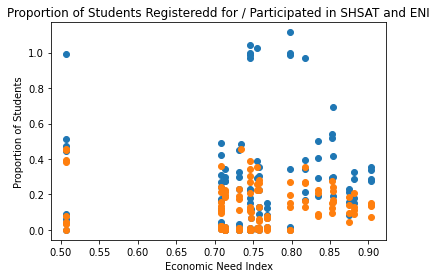

In [14]:
plt.plot('Economic Need Index', 'SHSAT Registration Proportion', 'o', data = data)
plt.plot('Economic Need Index', 'SHSAT Participation Proportion', 'o', data = data)
plt.title('Proportion of Students Registeredd for / Participated in SHSAT and ENI')
plt.xlabel('Economic Need Index')
plt.ylabel('Proportion of Students')



NameError: name 'dfs' is not defined

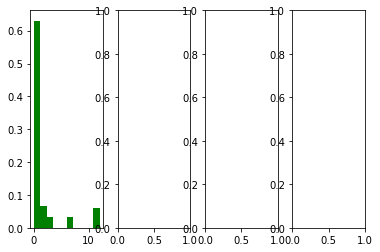

In [15]:
#Histograms of percentages of races in Manhattan
df_index = 0
for df in [group1.get_group(Did), group1.get_group(Not)]:
    fig, axs = plt.subplots(1,4)
    i = 0
    k = 0
    j = 0
    for r in races:
        color = ['g', 'b', 'r', 'm']
        axs[k].hist(r, color = color[i], data = df, weights=np.ones(len(df)) / len(df))
        axs[k].set_title("Distribution of " + r + ' (' + dfs[df_index] + ')')
        i += 1
        k += 1
    df_index += 1
    plt.subplots_adjust(left = 0, right = 3.4, bottom = 0, top = 0.5)
    plt.show()

Notably, in Manhattan, schools that have students registered for the SHSAT are also not generally dominated by a certain race, despite the disproportional representation in student demomgraphics at specialized schools. Though the demographics of Manhattan schools are different than New York as a whole, there does not seem to be a significant difference between the demographics of schools that register students for the SHSAT and those which do not.